# Jawan Pakistan
## Name: Asadullah
## Assignment : 12
# Data Analytics : B3

# install required library & connect to DB

In [1]:
# installing required libraries 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# Database connect
conn = sqlite3.connect("chinook.db")
conn

In [2]:
def sql_query(q):
    return pd.read_sql_query(q, conn)

In [3]:
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [4]:
sql_query("select * from sqlite_master where type = 'table'")

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


<img src="chinook_1.png" width = "60%"/>

In [5]:
q = """select * from genre
"""
sql_query(q)

,genre_id,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


### Q1. Write a query to list the top 10 genres with the highest number of tracks. (Show in bar plot)

<Axes: title={'center': 'Top 10 Genres by Track Count'}, xlabel='genre'>

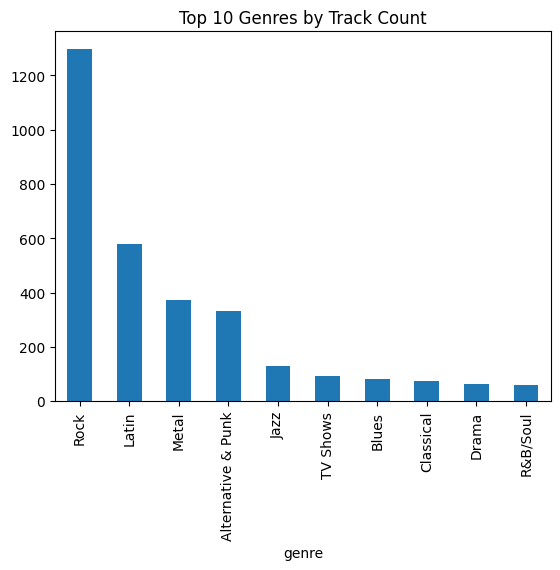

In [6]:
q = """select g.name as genre, count(t.track_id) as trackcount
from genre g
join track t on g.genre_id = t.genre_id
group by g.name
order by trackcount desc
limit 10

"""
a = pd.read_sql_query(q,conn)
a.plot(kind='bar',x ='genre',y ='trackcount',legend=False, title='Top 10 Genres by Track Count')

### Q2. Write a query to list the top 10 albums that contain the most tracks.

In [7]:
q="""select a.title as album, count(t.track_id) as trackcount
from album a
join track t on a.album_id = t.album_id
group by a.title
order by trackcount desc
limit 10
"""
sql_query(q)

,album,trackcount
0,Greatest Hits,57
1,Minha Historia,34
2,Unplugged,30
3,"Lost, Season 3",26
4,"The Office, Season 3",25
5,"Lost, Season 1",25
6,My Way: The Best Of Frank Sinatra [Disc 1],24
7,"Lost, Season 2",24
8,"Battlestar Galactica (Classic), Season 1",24
9,Instant Karma: The Amnesty International Campa...,23


### Q3. Write a query to find the top 10 customers who spent the most money.

In [8]:
q = """select c.customer_id, c.first_name, c.last_name, sum(i.total) as total_spent
from customer c
join invoice i on c.customer_id = i.customer_id
group by c.customer_id, c.first_name, c.last_name
order by total_spent desc
limit 10
"""
sql_query(q)

,customer_id,first_name,last_name,total_spent
0,5,František,Wichterlová,144.54
1,6,Helena,Holý,128.70
2,46,Hugh,O'Reilly,114.84
3,58,Manoj,Pareek,111.87
4,1,Luís,Gonçalves,108.90
5,13,Fernanda,Ramos,106.92
6,34,João,Fernandes,102.96
7,3,François,Tremblay,99.99
8,42,Wyatt,Girard,99.99
9,17,Jack,Smith,98.01


### Q4. Write a query to find the top 5 artists who generated the highest revenue from track sales.

In [9]:
q= """select ar.artist_id, ar.name as artist_name, sum(il.unit_price * il.quantity) as total_revenue
from artist ar
join album al on ar.artist_id = al.artist_id
join track t on al.album_id = t.album_id
join invoice_line il on t.track_id = il.track_id
group by ar.artist_id, ar.name
order by total_revenue desc
limit 5
"""
sql_query(q)

,artist_id,artist_name,total_revenue
0,51,Queen,190.08
1,94,Jimi Hendrix,185.13
2,110,Nirvana,128.70
3,127,Red Hot Chili Peppers,128.70
4,118,Pearl Jam,127.71


### Q5. Countries by Average Revenue per Invoice

In [10]:
q="""select c.country, avg(i.total) as avg_revenue_per_invoice
from customer c
join invoice i on c.customer_id = i.customer_id
group by c.country
order by avg_revenue_per_invoice desc
"""
sql_query(q)

,country,avg_revenue_per_invoice
0,Czech Republic,9.108000
1,Spain,8.910000
2,Ireland,8.833846
3,United Kingdom,8.768571
4,India,8.721429
5,Belgium,8.627143
6,Germany,8.161463
7,Australia,8.118000
8,Norway,8.030000
9,USA,7.942672


### Q6. Write a query to find the media type with number of tracks.


In [11]:
q="""select m.name as media_type, count(t.track_id) as track_count
from media_type m
join track t on m.media_type_id = t.media_type_id
group by m.name
order by track_count desc
"""
sql_query(q)

,media_type,track_count
0,MPEG audio file,3034
1,Protected AAC audio file,237
2,Protected MPEG-4 video file,214
3,AAC audio file,11
4,Purchased AAC audio file,7


### Q7. Which artists have released tracks in more than one genre?

In [12]:
q="""select ar.artist_id, ar.name as artist_name, count(distinct t.genre_id) as genre_count
from artist ar
join album al on ar.artist_id = al.artist_id
join track t on al.album_id = t.album_id
group by ar.artist_id, ar.name
having count(distinct t.genre_id) > 1
order by genre_count desc
"""
sql_query(q)

,artist_id,artist_name,genre_count
0,90,Iron Maiden,4
1,8,Audioslave,3
2,21,Various Artists,3
3,27,Gilberto Gil,3
4,92,Jamiroquai,3
5,100,Lenny Kravitz,3
6,147,Battlestar Galactica,3
7,6,Antônio Carlos Jobim,2
8,81,Eric Clapton,2
9,82,Faith No More,2


### Q8. Write a query to list the top 10 longest tracks by duration.

In [13]:
q="""select track_id, name as track_name, milliseconds
from track
order by milliseconds desc
limit 10
"""
sql_query(q)

,track_id,track_name,milliseconds
0,2820,Occupation / Precipice,5286953
1,3224,Through a Looking Glass,5088838
2,3244,"Greetings from Earth, Pt. 1",2960293
3,3242,The Man With Nine Lives,2956998
4,3227,"Battlestar Galactica, Pt. 2",2956081
5,3226,"Battlestar Galactica, Pt. 1",2952702
6,3243,Murder On the Rising Star,2935894
7,3228,"Battlestar Galactica, Pt. 3",2927802
8,3248,Take the Celestra,2927677
9,3239,Fire In Space,2926593


### Q9. Top 5 Revenue Share percentage by Artist (Pie Chart)

<Axes: title={'center': 'Top 5 Revenue Share by Artist'}>

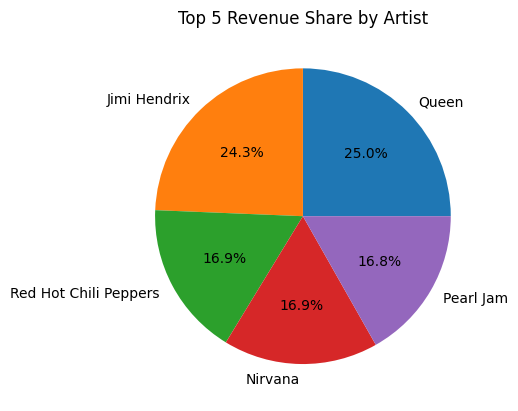

In [14]:
q = """
select ar.name as artist_name, 
       sum(il.unit_price * il.quantity) as total_revenue,
       (sum(il.unit_price * il.quantity) * 100.0 / 
        (select sum(unit_price * quantity) from invoice_line)) as revenue_percentage
from artist ar
join album al on ar.artist_id = al.artist_id
join track t on al.album_id = t.album_id
join invoice_line il on t.track_id = il.track_id
group by ar.name
order by total_revenue desc
limit 5
"""

b = pd.read_sql_query(q, conn)

# Pie chart of revenue percentage
b.set_index('artist_name')['revenue_percentage'].plot.pie(
    autopct='%1.1f%%', 
    ylabel='', 
    title='Top 5 Revenue Share by Artist'
)


### Q10. Revenue by Genre (Rock, Latin, Metal) in Each Country (Stacked Column Chart)

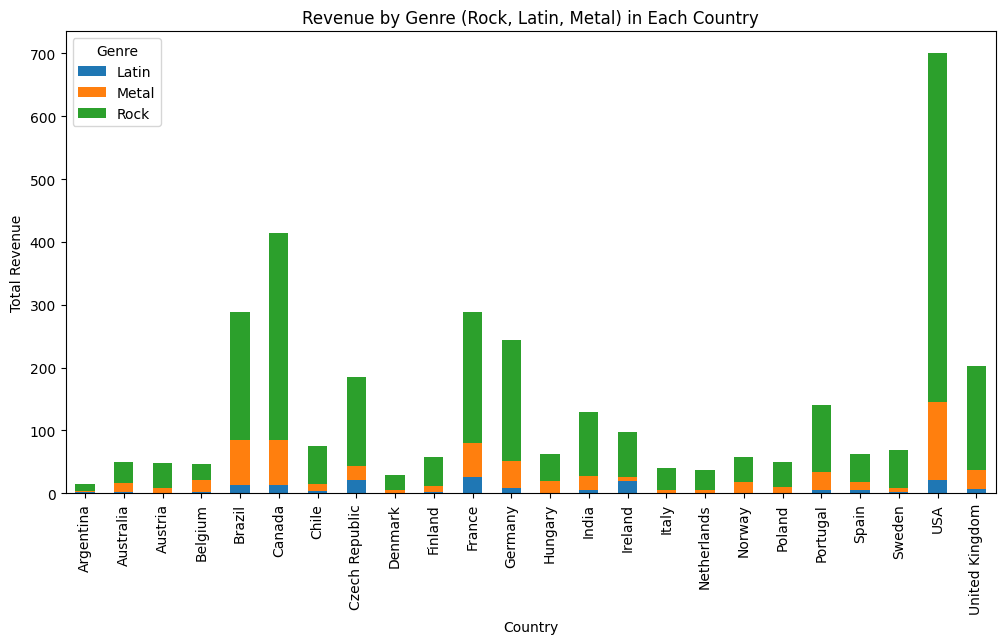

In [15]:
q = """
SELECT c.country,
       g.name AS genre,
       SUM(il.unit_price * il.quantity) AS total_revenue
FROM invoice i
JOIN customer c ON i.customer_id = c.customer_id
JOIN invoice_line il ON i.invoice_id = il.invoice_id
JOIN track t ON il.track_id = t.track_id
JOIN genre g ON t.genre_id = g.genre_id
WHERE g.name IN ('Rock', 'Latin', 'Metal')
GROUP BY c.country, g.name
ORDER BY c.country, g.name
"""

df = pd.read_sql_query(q, conn)

# Pivot for stacked bar chart
pivot_df = df.pivot(index='country', columns='genre', values='total_revenue').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Revenue by Genre (Rock, Latin, Metal) in Each Country')
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.legend(title='Genre')
plt.show()
